In [ ]:
cd /glade/work/joyceyang

In [2]:
# Imports 
%matplotlib inline
import os, glob
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd  
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime 
from datetime import date, datetime, timedelta

lat_grid = np.load('lat_grid.npy')
lon_grid = np.load('lon_grid.npy')

In [13]:
%%time
class Graph(): 
    def Plot(title, figname, variable):
        fig, axes = plt.subplots(figsize=(20,10)) # initialize plot of size 20x10
        ax = plt.axes(projection=ccrs.PlateCarree()) # define projection as Plate Carree
        ax.add_feature(cfeature.BORDERS, linestyle=':') # add in country borders
        ax.set_global() # set map extent to global 
        ax.coastlines() # add in coastlines 
        plt.tight_layout()
        
        c = variable - 273 # convert to Celsius 
        
        plt.scatter(lon_grid, lat_grid, c=c, transform=ccrs.PlateCarree(), s=10, marker='s')

        plt.title(title, size=20)
        cbar = plt.colorbar(shrink=0.6) # create colorbar 
        cbar.set_label('Temperature (C)    ', rotation=270)

        plt.savefig(figname)

        
        
# Open dataset 
def open_file_R(file, landunit=1): 
    nc = xr.open_dataset(file)
    tsa = nc.TSA.squeeze().where(nc1.pfts1d_itype_lunit==landunit) # change landunit
    wt = nc.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==landunit)
    tsa_cube = np.full((288,192,15), np.nan)
    wt_cube = np.full((288,192,15), np.nan)

    for i in range(1,289):
        for j in range(1,193):
            vmask = (np.isnan(tsa.where(nc.pfts1d_ixy==i).where(nc.pfts1d_jxy==j)) == False)
            v = tsa[vmask].values
            w = wt[vmask].values
            for k in range(len(v)):
                tsa_cube[i-1,j-1,k] = v[k]
                wt_cube[i-1,j-1,k] = w[k]
    
    tsa_grid = np.nansum((np.multiply(tsa_cube, wt_cube)), axis=2)
    
    foo = xr.DataArray(data=tsa_grid, 
                   coords={"lat": (["x","y"], lat_grid), "lon": (["x","y"], lon_grid)}, 
                   dims=["x","y"], 
                    name='TSA_R') 
    print(nc.TSA.coords['time'].values)

    return foo


def nansumwrapper(a, **kwargs):
    if np.isnan(a).all():
        return np.nan
    else:
        return np.nansum(a, **kwargs)


# Open dataset (urban)
def open_file_U(file): 
    nc = xr.open_dataset(file)
   

    # Urban TBD Grid 
    tsa1 = nc.TSA.squeeze().where(nc.pfts1d_itype_lunit==7) # change landunit
    wt1 = nc.pfts1d_wtlunit.where(nc.pfts1d_itype_lunit==7)
    
    tsa_cube1 = np.full((288,192,15), float("NaN"))
    wt_cube1 = np.full((288,192,15), np.nan)

    for i in range(1,289):
        for j in range(1,193):
            vmask = (np.isnan(tsa1.where(nc.pfts1d_ixy==i).where(nc.pfts1d_jxy==j)) == False)
            v = tsa1[vmask].values
            w = wt1[vmask].values
            for k in range(len(v)):
                tsa_cube1[i-1,j-1,k] = v[k]
                wt_cube1[i-1,j-1,k] = w[k]
    
    print(tsa_cube1)
    mult = np.multiply(tsa_cube1, wt_cube1)
    print('mult', mult)
    tsa_grid1 = nansumwrapper(mult, axis=2)
    print(tsa_grid1)
    print("Urban TBD grid done") # TODO temporary
    
    
    # Urban HD Grid 
    tsa2 = nc.TSA.squeeze().where(nc.pfts1d_itype_lunit==8)
    wt2 = nc.pfts1d_wtlunit.where(nc.pfts1d_itype_lunit==8)
    
    tsa_cube2 = np.full((288,192,15), np.nan)
    wt_cube2 = np.full((288,192,15), np.nan)
    
    for i in range(1,289):
        for j in range(1,193):
            vmask = (np.isnan(tsa2.where(nc.pfts1d_ixy==i).where(nc.pfts1d_jxy==j)) == False)
            v = tsa2[vmask].values
            w = wt2[vmask].values
            for k in range(len(v)):
                tsa_cube2[i-1,j-1,k] = v[k]
                wt_cube2[i-1,j-1,k] = w[k]
    
    tsa_grid2 = np.nansum((np.multiply(tsa_cube2, wt_cube2)), axis=2)
    print("Urban HD grid done") # TODO temporary
    
    
    #Urban MD Grid 
    tsa3 = nc.TSA.squeeze().where(nc.pfts1d_itype_lunit==9)
    wt3 = nc.pfts1d_wtlunit.where(nc.pfts1d_itype_lunit==9)
    
    tsa_cube3 = np.full((288,192,15), np.nan)
    wt_cube3 = np.full((288,192,15), np.nan)
    
    for i in range(1,289):
        for j in range(1,193):
            vmask = (np.isnan(tsa3.where(nc.pfts1d_ixy==i).where(nc.pfts1d_jxy==j)) == False)
            v = tsa3[vmask].values
            w = wt3[vmask].values
            for k in range(len(v)):
                tsa_cube3[i-1,j-1,k] = v[k]
                wt_cube3[i-1,j-1,k] = w[k]
    
    tsa_grid3 = np.nansum((np.multiply(tsa_cube3, wt_cube3)), axis=2)
    print("Urban MD grid done") # TODO temporary
    
    
    # Combine all cubes together into one grid 
    
    # TBD landunit weight in grid cell 
    TBD = nc.land1d_wtgcell.where(nc.land1d_ityplunit==7)
    wtlunit_gcell_grid_TBD = np.full((288,192), float("NaN")) # should I add in third dimension of 1

    for i in range(1,289): 
        for j in range(1,193):
            vmask = (np.isnan(TBD.where(nc.land1d_ixy==i).where(nc.land1d_jxy==j)) == False)
            v = TBD[vmask].values
            if v.size == 0: 
                v = float("NaN")
            wtlunit_gcell_grid_TBD[i-1,j-1] = v
            
    print("TBD weight grid done") # TODO temporary
    
    # HD landunit weight in grid cell 
    HD = nc.land1d_wtgcell.where(nc.land1d_ityplunit==8)
    wtlunit_gcell_grid_HD = np.full((288,192), float("NaN")) 

    for i in range(1,289): 
        for j in range(1,193):
            vmask = (np.isnan(HD.where(nc.land1d_ixy==i).where(nc.land1d_jxy==j)) == False)
            v = HD[vmask].values
            if v.size == 0: 
                v = float("NaN")
            wtlunit_gcell_grid_HD[i-1,j-1] = v
            
    print("HD weight grid done") # TODO temporary
    
    # MD landunit weight in grid cell 
    MD = nc.land1d_wtgcell.where(nc.land1d_ityplunit==9)
    wtlunit_gcell_grid_MD = np.full((288,192), float("NaN")) 

    for i in range(1,289): 
        for j in range(1,193):
            vmask = (np.isnan(MD.where(nc.land1d_ixy==i).where(nc.land1d_jxy==j)) == False)
            v = MD[vmask].values
            if v.size == 0: 
                v = float("NaN")
            wtlunit_gcell_grid_MD[i-1,j-1] = v
            
    print("MD weight grid done") # TODO temporary
    
    
    x = np.multiply(tsa_grid1, wtlunit_gcell_grid_TBD)
    y = np.multiply(tsa_grid2, wtlunit_gcell_grid_HD)
    z = np.multiply(tsa_grid3, wtlunit_gcell_grid_MD)
    
    print("Created three intermediate grids ")

    num = np.nansum((x,y,z), axis=0)
    den = np.nansum((wtlunit_gcell_grid_TBD,wtlunit_gcell_grid_HD,wtlunit_gcell_grid_MD), axis=0)
    
    print("Created num and den for urban_tot")

    urban_tot = num/den
    
    #foo = xr.DataArray(data=urban_tot, 
    #               coords={"lat": (["x","y"], lat_grid), "lon": (["x","y"], lon_grid)}, 
    #               dims=["x","y"], 
    #                name='TSA_U') 
    
    foo = xr.Dataset({'TSA_TBD': (['x','y'], tsa_grid1),
                     'TSA_HD': (['x', 'y'], tsa_grid2),
                     'TSA_MD': (['x', 'y'], tsa_grid3),
                     'TSA_TOT': (['x', 'y'], urban_tot)},
                    coords = {'lon': (['x', 'y'], lon_grid),
                             'lat': (['x', 'y'], lat_grid)})
    
    print(nc.TSA.coords['time'].values)

    return foo



# File Name Generator 
def filename_generator(season, start_date, end_date):
    if season == 'winter':
        months = ['-01', '-02', '-12']
    elif season == 'summer': 
        months = ['-06', '-07', '-08']
    else: 
        print('give a season')
    
    prefix = 'CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.'
    
    years = list(str(i) for i in range(start_date, end_date+1))
    suffix = '.nc'
    filenames = [prefix+year+month+suffix for month in months for year in years]
    return filenames     



# Generate list of dates
def date_generator(season,start,end):
    dates = []
    
    if season == 'winter': 
        month = [1, 2, 12]
    if season == 'summer':
        month = [6, 7, 8]

    year = start 
    while year <= end: 
        for i in month:
            dates.append(datetime(year,i,1))
        year += 1

    return dates 

CPU times: user 90 µs, sys: 0 ns, total: 90 µs
Wall time: 97 µs


# Urban

DJF

In [14]:
filenames = filename_generator(season='winter',start_date=2015,end_date=2015)
dates = date_generator("winter", 2015, 2015)
print(filenames)
print(dates)

['CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-01.nc', 'CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-02.nc', 'CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-12.nc']
[datetime.datetime(2015, 1, 1, 0, 0), datetime.datetime(2015, 2, 1, 0, 0), datetime.datetime(2015, 12, 1, 0, 0)]


In [ ]:
%%time

i = 0
tosave = 'TSA_U_2015.01'

ds = open_file_U(filenames[i])
dataDIR = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds = ds.assign_coords(time=dates[i])
ds = ds.expand_dims('time')
ds.to_netcdf(dataDIR)

In [10]:
ds.TSA_TBD

<xarray.DataArray 'TSA_TBD' (time: 1, x: 288, y: 192)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
    lon      (x, y) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan nan
    lat      (x, y) float64 -90.0 -89.06 -88.12 -87.17 ... nan nan nan nan
  * time     (time) datetime64[ns] 2015-01-01
Dimensions without coordinates: x, y

In [11]:
np.nansum(ds.TSA_TBD)

41946.699615478516

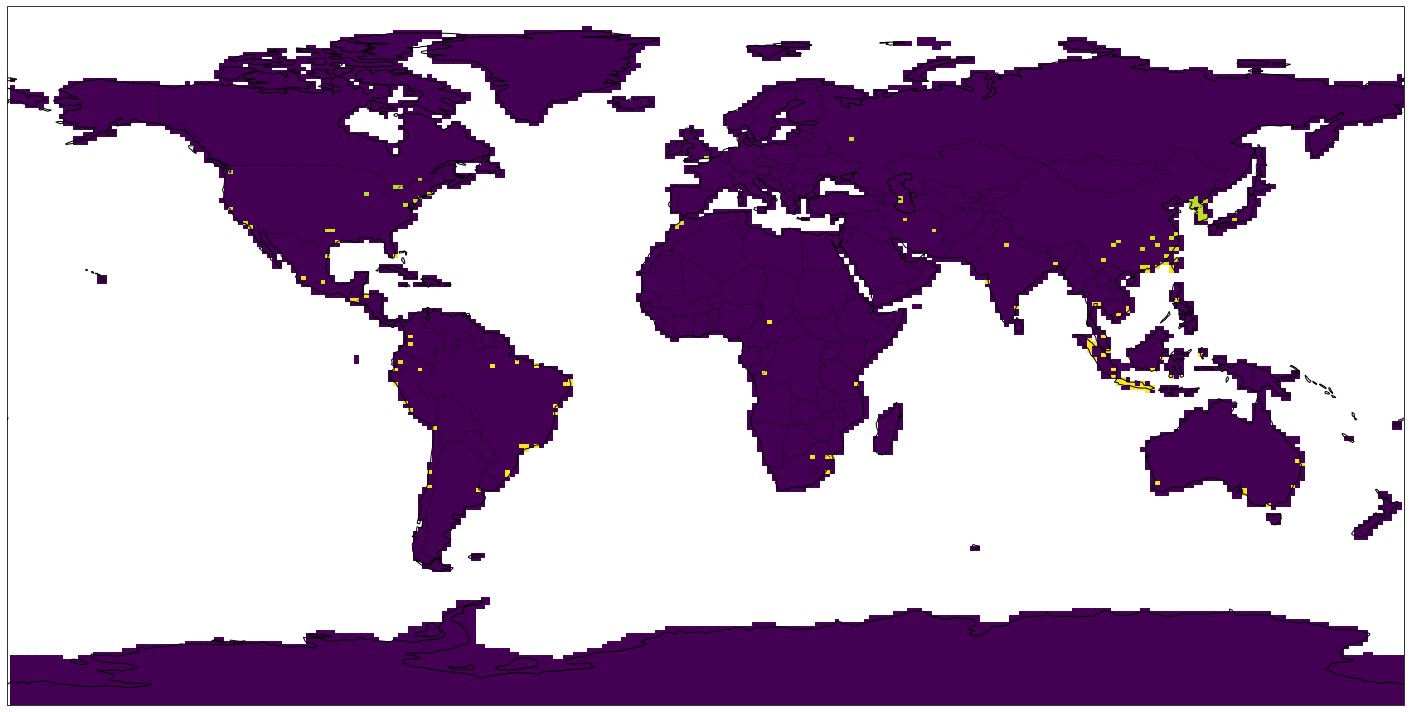

In [12]:
fig, axes = plt.subplots(figsize=(20,10)) # initialize plot of size 20x10
ax = plt.axes(projection=ccrs.PlateCarree()) # define projection as Plate Carree
ax.add_feature(cfeature.BORDERS, linestyle=':') # add in country borders
ax.set_global() # set map extent to global 
ax.coastlines() # add in coastlines 
plt.tight_layout()

c = ds.TSA_TBD.mean(dim='time') # convert to Celsius 

plt.scatter(ds.lon, ds.lat, c=c, transform=ccrs.PlateCarree(), s=15, marker='s')

In [6]:
%%time

i = 1
tosave = 'TSA_U_2015.02'

ds = open_file_U(filenames[i])
dataDIR = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds = ds.assign_coords(time=dates[i])
ds = ds.expand_dims('time')
ds.to_netcdf(dataDIR)

Urban TBD grid done
Urban HD grid done
Urban MD grid done
TBD weight grid done
HD weight grid done
MD weight grid done
Created three intermediate grids 
Created num and den for urban_tot
[cftime.DatetimeNoLeap(2015, 3, 1, 0, 0, 0, 0, 2, 60)]
CPU times: user 44min 44s, sys: 581 ms, total: 44min 45s
Wall time: 44min 51s


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide


In [7]:
%%time

i = 2
tosave = 'TSA_U_2015.12'

ds = open_file_U(filenames[i])
dataDIR = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds = ds.assign_coords(time=dates[i])
ds = ds.expand_dims('time')
ds.to_netcdf(dataDIR)

Urban TBD grid done
Urban HD grid done
Urban MD grid done
TBD weight grid done
HD weight grid done
MD weight grid done
Created three intermediate grids 
Created num and den for urban_tot
[cftime.DatetimeNoLeap(2016, 1, 1, 0, 0, 0, 0, 0, 1)]
CPU times: user 41min 45s, sys: 476 ms, total: 41min 46s
Wall time: 41min 50s


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


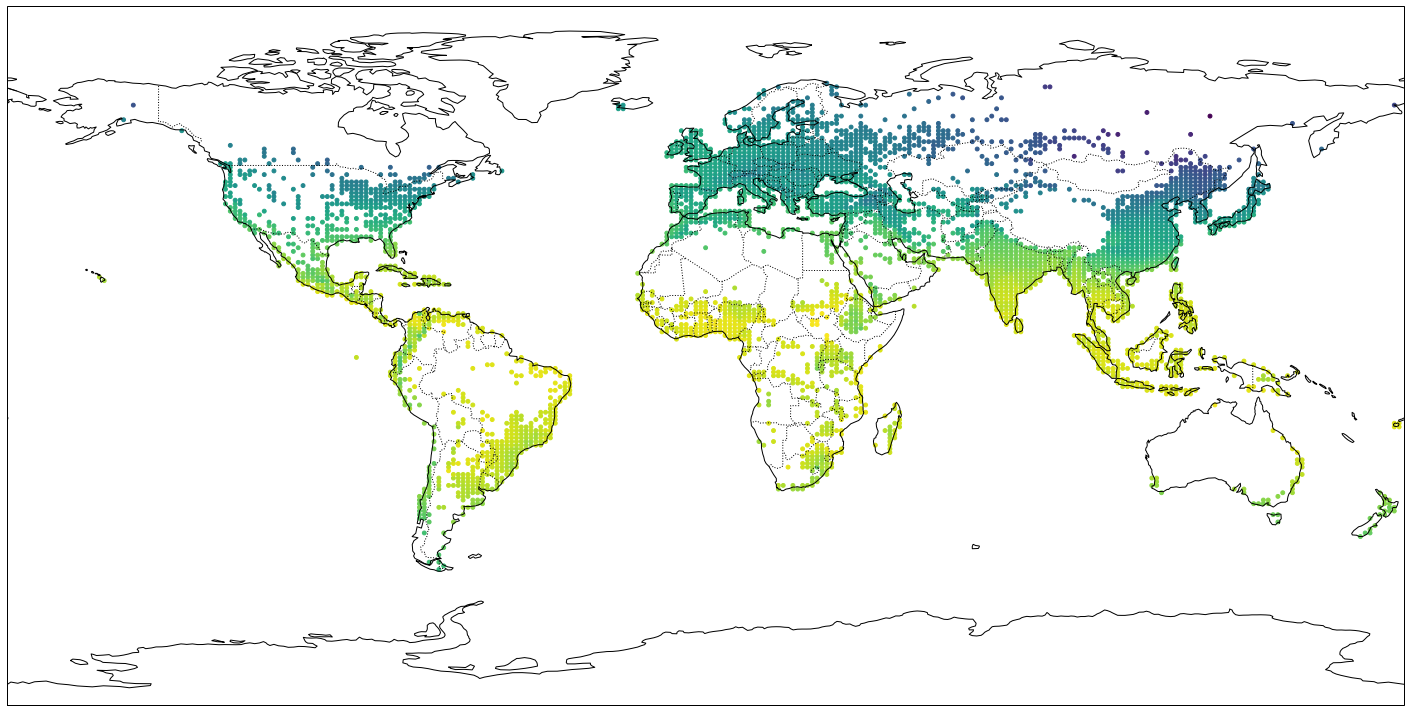

In [8]:
tosave = 'TSA_U_2015_DJF' # 

nc0 = xr.open_dataset('GlobalUHI_Plots/TSA_U_2015.01.nc')
nc1 = xr.open_dataset('GlobalUHI_Plots/TSA_U_2015.02.nc')
nc2 = xr.open_dataset('GlobalUHI_Plots/TSA_U_2015.12.nc')
ds = xr.concat([nc0, nc1, nc2], dim='time')

dataDIR  = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds.to_netcdf(dataDIR)

<xarray.DataArray 'time' ()>
array('2015-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2015-01-01


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


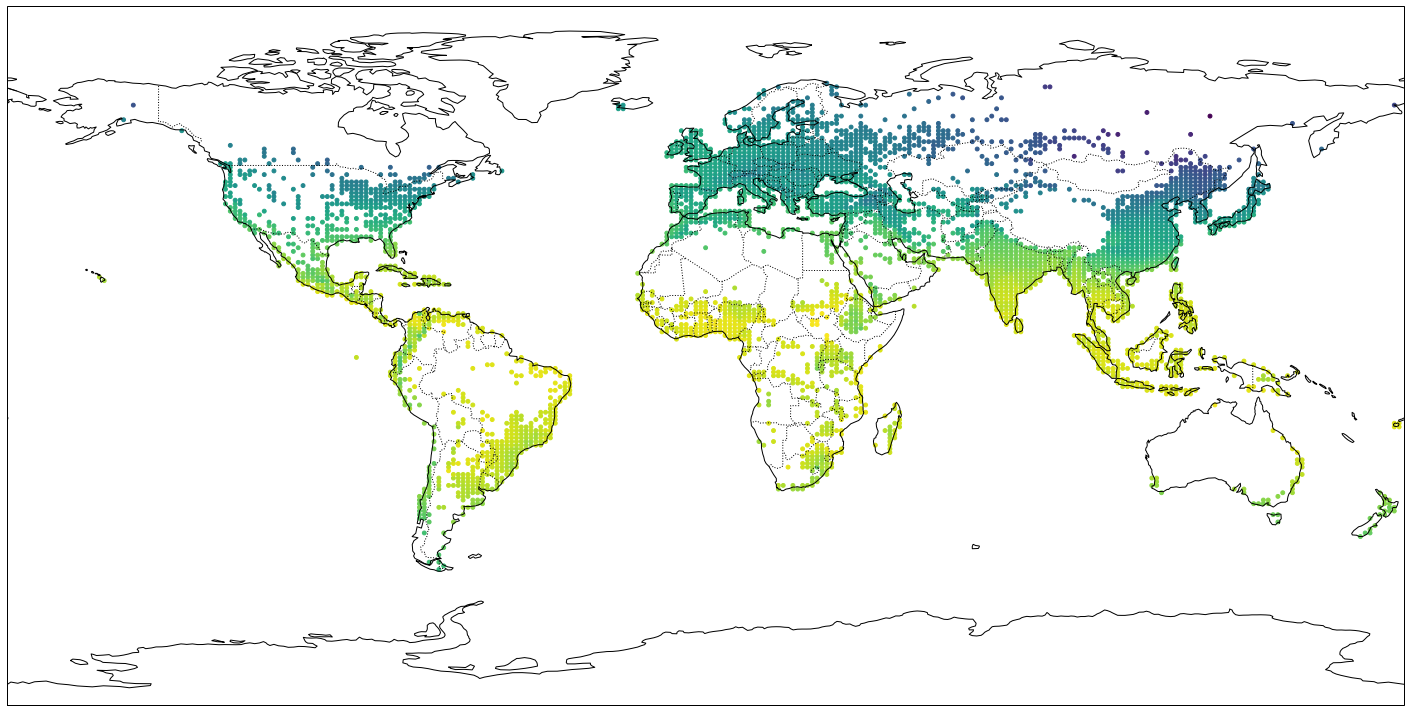

In [10]:
tosave = 'TSA_U_2015_DJF' # 

dataDIR  = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'

nc = xr.open_dataset(dataDIR)
print(nc.time[0])

fig, axes = plt.subplots(figsize=(20,10)) # initialize plot of size 20x10
ax = plt.axes(projection=ccrs.PlateCarree()) # define projection as Plate Carree
ax.add_feature(cfeature.BORDERS, linestyle=':') # add in country borders
ax.set_global() # set map extent to global 
ax.coastlines() # add in coastlines 
plt.tight_layout()

c = nc.TSA_U.mean(dim='time') - 273 # convert to Celsius 

plt.scatter(nc.TSA_U.lon, nc.TSA_U.lat, c=c, transform=ccrs.PlateCarree(), s=15, marker='o')

JJA

In [9]:
filenames = filename_generator(season='summer',start_date=2015,end_date=2015)
dates = date_generator("summer", 2015, 2015)
print(filenames)
print(dates)

['CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-06.nc', 'CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-07.nc', 'CLM_h1_files/clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-08.nc']
[datetime.datetime(2015, 6, 1, 0, 0), datetime.datetime(2015, 7, 1, 0, 0), datetime.datetime(2015, 8, 1, 0, 0)]


In [10]:
%%time

i = 0
tosave = 'TSA_U_2015.06'

ds = open_file_U(filenames[i])
dataDIR = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds = ds.assign_coords(time=dates[i])
ds = ds.expand_dims('time')
ds.to_netcdf(dataDIR)

Urban TBD grid done
Urban HD grid done
Urban MD grid done
TBD weight grid done
HD weight grid done
MD weight grid done
Created three intermediate grids 
Created num and den for urban_tot
[cftime.DatetimeNoLeap(2015, 7, 1, 0, 0, 0, 0, 5, 182)]
CPU times: user 39min 23s, sys: 648 ms, total: 39min 23s
Wall time: 39min 24s


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide


In [11]:
%%time

i = 1
tosave = 'TSA_U_2015.07'

ds = open_file_U(filenames[i])
dataDIR = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds = ds.assign_coords(time=dates[i])
ds = ds.expand_dims('time')
ds.to_netcdf(dataDIR)

Urban TBD grid done
Urban HD grid done
Urban MD grid done
TBD weight grid done
HD weight grid done
MD weight grid done
Created three intermediate grids 
Created num and den for urban_tot
[cftime.DatetimeNoLeap(2015, 8, 1, 0, 0, 0, 0, 1, 213)]
CPU times: user 37min 34s, sys: 440 ms, total: 37min 35s
Wall time: 37min 36s


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide


In [12]:
%%time

i = 2
tosave = 'TSA_U_2015.08'

ds = open_file_U(filenames[i])
dataDIR = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds = ds.assign_coords(time=dates[i])
ds = ds.expand_dims('time')
ds.to_netcdf(dataDIR)

Urban TBD grid done
Urban HD grid done
Urban MD grid done
TBD weight grid done
HD weight grid done
MD weight grid done
Created three intermediate grids 
Created num and den for urban_tot
[cftime.DatetimeNoLeap(2015, 9, 1, 0, 0, 0, 0, 4, 244)]
CPU times: user 36min 40s, sys: 360 ms, total: 36min 40s
Wall time: 36min 41s


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in true_divide


In [15]:
tosave = 'TSA_U_2015_JJA' # 

nc0 = xr.open_dataset('GlobalUHI_Plots/TSA_U_2015.06.nc') #
nc1 = xr.open_dataset('GlobalUHI_Plots/TSA_U_2015.07.nc') # 
nc2 = xr.open_dataset('GlobalUHI_Plots/TSA_U_2015.08.nc') # 
ds = xr.concat([nc0, nc1, nc2], dim='time')

dataDIR  = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'
ds.to_netcdf(dataDIR)

PermissionError: [Errno 13] Permission denied: b'/glade/work/joyceyang/GlobalUHI_Plots/TSA_U_2015_JJA.nc'

<xarray.DataArray 'time' ()>
array('2015-06-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2015-06-01


/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


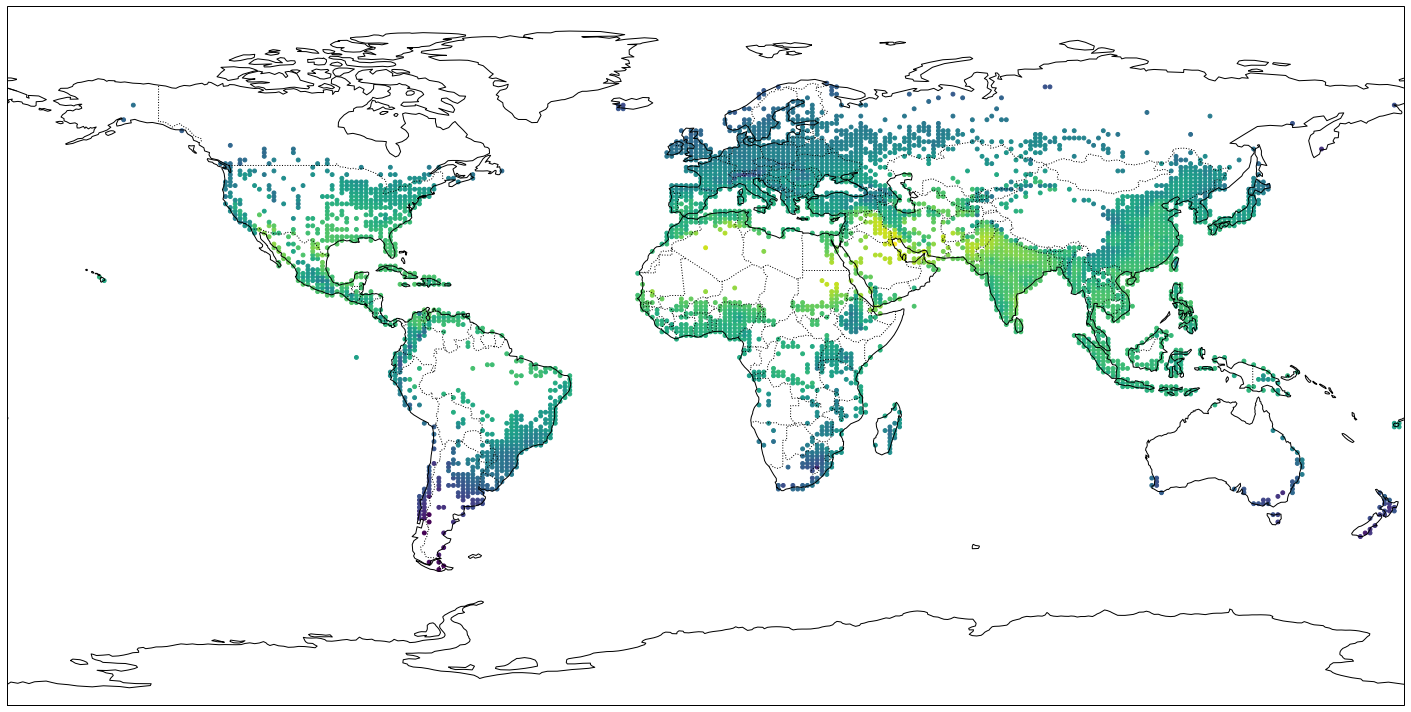

In [6]:
tosave = 'TSA_U_2015_JJA' # 

dataDIR  = '/glade/work/joyceyang/GlobalUHI_Plots/' + tosave + '.nc'

nc = xr.open_dataset(dataDIR)
print(nc.TSA_U.time[0])

fig, axes = plt.subplots(figsize=(20,10)) # initialize plot of size 20x10
ax = plt.axes(projection=ccrs.PlateCarree()) # define projection as Plate Carree
ax.add_feature(cfeature.BORDERS, linestyle=':') # add in country borders
ax.set_global() # set map extent to global 
ax.coastlines() # add in coastlines 
plt.tight_layout()

c = nc.TSA_U.mean(dim='time') - 273 # convert to Celsius 

plt.scatter(nc.TSA_U.lon, nc.TSA_U.lat, c=c, transform=ccrs.PlateCarree(), s=15, marker='o')